c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



📊 Unbalanced Data
F1-score (avg): 0.5798373983739837  std: 0.1863210306764588
Accuracy (avg): 0.7102272727272727  std: 0.22289824143105716

📊 SMOTE Balanced
F1-score (avg): 0.8650290842742188  std: 0.07453295963757665
Accuracy (avg): 0.8357142857142856  std: 0.10177004891982147

📊 ADASYN Balanced
F1-score (avg): 0.8143575741850262  std: 0.06984932620983558
Accuracy (avg): 0.7760060362173038  std: 0.09433309031721646


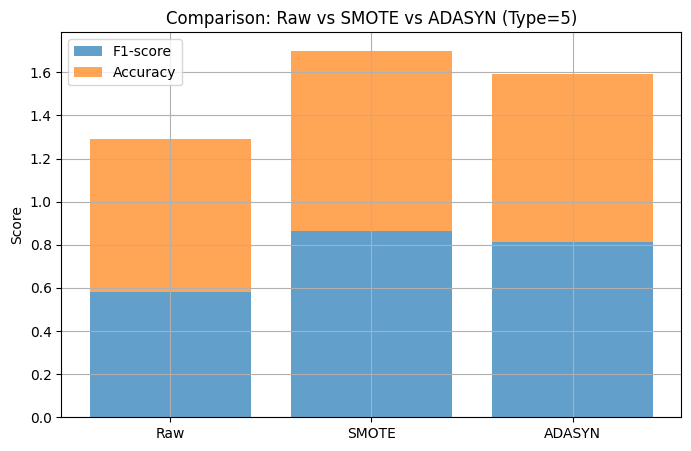

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import MinMaxScaler

# --------------------------------
# 📂 2. 加载归一化数据
# --------------------------------
# 修改点：读取用户提供的sorted_data.csv文件
df = pd.read_csv("sorted_data.csv")  # 替换为实际数据文件路径

# ----------------------------
# 2. 特征/目标分离（保持原始逻辑）
# ----------------------------
# 修改点：将type=5转换为二分类目标
X = df.drop(columns=["Type"])  # 假设特征列不包含type列
y = (df["Type"] == 5).astype(int)  # 将type=5转为1，其他转为0

# 可选：MinMaxScaler 再次确认归一化
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# --------------------------------
# 🧠 3. 定义模型结构（使用最佳结构）
# --------------------------------
def get_model():
    return MLPClassifier(
        hidden_layer_sizes=(64,),
        activation='relu',
        solver='lbfgs',
        max_iter=500,
        random_state=42
    )

# --------------------------------
# ⚖️ 4. 定义评估函数
# --------------------------------
def evaluate(X, y, title):
    model = get_model()
    scores = cross_validate(model, X, y, cv=4, scoring={"f1": "f1", "accuracy": "accuracy"})
    print(f"\n📊 {title}")
    print("F1-score (avg):", scores['test_f1'].mean(), " std:", scores['test_f1'].std())
    print("Accuracy (avg):", scores['test_accuracy'].mean(), " std:", scores['test_accuracy'].std())
    return scores

# --------------------------------
# ✅ 5. 原始不平衡数据评估
# --------------------------------
raw_scores = evaluate(X, y, "Unbalanced Data")

# --------------------------------
# ⚙️ 6. SMOTE 平衡
# --------------------------------
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
smote_scores = evaluate(X_smote, y_smote, "SMOTE Balanced")

# --------------------------------
# ⚙️ 7. ADASYN 平衡
# --------------------------------
adasyn = ADASYN(random_state=42)
X_ada, y_ada = adasyn.fit_resample(X, y)
adasyn_scores = evaluate(X_ada, y_ada, "ADASYN Balanced")

# --------------------------------
# 📈 8. 可视化对比
# --------------------------------
labels = ['Raw', 'SMOTE', 'ADASYN']
f1_avgs = [raw_scores['test_f1'].mean(), smote_scores['test_f1'].mean(), adasyn_scores['test_f1'].mean()]
acc_avgs = [raw_scores['test_accuracy'].mean(), smote_scores['test_accuracy'].mean(), adasyn_scores['test_accuracy'].mean()]

plt.figure(figsize=(8, 5))
plt.bar(labels, f1_avgs, alpha=0.7, label="F1-score")
plt.bar(labels, acc_avgs, alpha=0.7, label="Accuracy", bottom=f1_avgs)
plt.title("Comparison: Raw vs SMOTE vs ADASYN (Type=5)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE  # 可替换为 ADASYN

# --------------------------------
# 📦 1. 导入依赖库
# --------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE  # 可替换为 ADASYN

# ----------------------------
# 1. 加载数据（使用用户提供的sorted_data.csv）
# ----------------------------
train_data = pd.read_excel('Data_Set_(A+B).xlsx')

# ----------------------------
# 2. 特征/目标分离（保持原始逻辑）
# ----------------------------
# 修改点：将type=5转换为二分类目标
X = train_data.drop(columns=["Type"])  # 假设特征列不包含type列
y = (train_data["Type"] == 5).astype(int)  # 将type=5转为1，其他转为0

# --------------------------------
# 🔄 3. 归一化处理
# --------------------------------
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# --------------------------------
# ⚖️ 4. 平衡样本（使用 SMOTE）
# --------------------------------
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

# --------------------------------
# ⚙️ 5. 多组结构组合配置 config_list
# --------------------------------
config_list = config_list = [
    # 原始配置组
    {"layers": (50, 25, 12), "activation": "relu", "solver": "adam"},
    {"layers": (50, 25, 12), "activation": "tanh", "solver": "adam"},
    {"layers": (50, 25, 12), "activation": "logistic", "solver": "adam"},
    {"layers": (50, 25, 12), "activation": "relu", "solver": "lbfgs"},
    {"layers": (50, 25, 12), "activation": "tanh", "solver": "lbfgs"},
    
    # 扩展结构组
    {"layers": (64,), "activation": "relu", "solver": "lbfgs"},
    {"layers": (128, 64), "activation": "relu", "solver": "lbfgs"},
    {"layers": (100, 50, 25, 10), "activation": "relu", "solver": "lbfgs"},
    {"layers": (64, 32, 16, 8), "activation": "relu", "solver": "lbfgs"},
    {"layers": (50, 25, 12, 6), "activation": "relu", "solver": "lbfgs"},
    
    # 混合配置组
    {"layers": (64, 32), "activation": "tanh", "solver": "adam"},
    {"layers": (64, 32), "activation": "tanh", "solver": "lbfgs"},
    {"layers": (64, 32), "activation": "tanh", "solver": "sgd"},
    
    {"layers": (50, 50,25), "activation": "relu", "solver": "adam"},
    {"layers": (50, 50,25), "activation": "tanh", "solver": "adam"},
    {"layers": (100, 50), "activation": "tanh", "solver": "adam"},
    {"layers": (128, 64, 32), "activation": "relu", "solver": "lbfgs"},
    {"layers": (50, 25, 12), "activation": "tanh", "solver": "lbfgs"},
    {"layers": (50, 25, 12), "activation": "relu", "solver": "adam"},
    {"layers": (50, 25, 12,6), "activation": "relu", "solver": "adam"},
]

# --------------------------------
# 🧪 6. 批量训练每组参数配置
# --------------------------------
results = []

for cfg in config_list:
    model = MLPClassifier(
        hidden_layer_sizes=cfg["layers"],
        activation=cfg["activation"],
        solver=cfg["solver"],
        max_iter=500,
        random_state=42
    )
    
    scores = cross_validate(model, X_bal, y_bal, cv=4, scoring={"f1": "f1", "accuracy": "accuracy"})
    
    results.append({
        "layers": cfg["layers"],
        "activation": cfg["activation"],
        "solver": cfg["solver"],
        "F1-avg": scores["test_f1"].mean(),
        "F1-std": scores["test_f1"].std(),
        "Acc-avg": scores["test_accuracy"].mean(),
        "Acc-std": scores["test_accuracy"].std()
    })

# --------------------------------
# 📊 7. 显示结果表格
# --------------------------------
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="F1-avg", ascending=False).reset_index(drop=True)
df_results

c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perce

,layers,activation,solver,F1-avg,F1-std,Acc-avg,Acc-std
0,"(128, 64)",relu,lbfgs,0.952601,0.014494,0.950000,0.015972
1,"(50, 25, 12)",relu,lbfgs,0.947950,0.028933,0.946429,0.029233
2,"(100, 50, 25, 10)",relu,lbfgs,0.943211,0.020397,0.939286,0.023419
3,"(128, 64, 32)",relu,lbfgs,0.927512,0.018112,0.921429,0.021429
4,"(64,)",relu,lbfgs,0.923999,0.022189,0.917857,0.025505
5,"(50, 25, 12)",tanh,lbfgs,0.918635,0.040352,0.914286,0.041650
6,"(50, 25, 12)",tanh,lbfgs,0.918635,0.040352,0.914286,0.041650
7,"(64, 32, 16, 8)",relu,lbfgs,0.917476,0.047872,0.914286,0.048445
8,"(50, 25, 12, 6)",relu,lbfgs,0.905887,0.040866,0.896429,0.046702
9,"(64, 32)",tanh,lbfgs,0.898262,0.023993,0.889286,0.025505


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN  # 使用 ADASYN 平衡数据

# --------------------------------
# 📦 1. 导入依赖
# --------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN

# ----------------------------
# 1. 加载数据（使用用户提供的sorted_data.csv）
# ----------------------------
train_data = pd.read_excel('Data_Set_(A+B).xlsx')

# ----------------------------
# 2. 特征/目标分离（保持原始逻辑）
# ----------------------------
# 修改点：将type=5转换为二分类目标
X = train_data.drop(columns=["Type"])  # 假设特征列不包含type列
y = (train_data["Type"] == 5).astype(int)  # 将type=5转为1，其他转为0


# --------------------------------
# 🔄 3. 归一化
# --------------------------------
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# --------------------------------
# ⚖️ 4. 使用 ADASYN 进行平衡
# --------------------------------
adasyn = ADASYN(random_state=42)
X_bal, y_bal = adasyn.fit_resample(X, y)

# --------------------------------
# ⚙️ 5. 模型结构组合列表
# --------------------------------
config_list = config_list = [
    # 原始配置组
    {"layers": (50, 25, 12), "activation": "relu", "solver": "adam"},
    {"layers": (50, 25, 12), "activation": "tanh", "solver": "adam"},
    {"layers": (50, 25, 12), "activation": "logistic", "solver": "adam"},
    {"layers": (50, 25, 12), "activation": "relu", "solver": "lbfgs"},
    {"layers": (50, 25, 12), "activation": "tanh", "solver": "lbfgs"},
    
    # 扩展结构组
    {"layers": (64,), "activation": "relu", "solver": "lbfgs"},
    {"layers": (128, 64), "activation": "relu", "solver": "lbfgs"},
    {"layers": (100, 50, 25, 10), "activation": "relu", "solver": "lbfgs"},
    {"layers": (64, 32, 16, 8), "activation": "relu", "solver": "lbfgs"},
    {"layers": (50, 25, 12, 6), "activation": "relu", "solver": "lbfgs"},
    
    # 混合配置组
    {"layers": (64, 32), "activation": "tanh", "solver": "adam"},
    {"layers": (64, 32), "activation": "tanh", "solver": "lbfgs"},
    {"layers": (64, 32), "activation": "tanh", "solver": "sgd"},
    
    {"layers": (50, 50,25), "activation": "relu", "solver": "adam"},
    {"layers": (50, 50,25), "activation": "tanh", "solver": "adam"},
    {"layers": (100, 50), "activation": "tanh", "solver": "adam"},
    {"layers": (128, 64, 32), "activation": "relu", "solver": "lbfgs"},
    {"layers": (50, 25, 12), "activation": "tanh", "solver": "lbfgs"},
    {"layers": (50, 25, 12), "activation": "relu", "solver": "adam"},
    {"layers": (50, 25, 12,6), "activation": "relu", "solver": "adam"},
]

# --------------------------------
# 🧪 6. 批量评估模型
# --------------------------------
results = []

for cfg in config_list:
    model = MLPClassifier(
        hidden_layer_sizes=cfg["layers"],
        activation=cfg["activation"],
        solver=cfg["solver"],
        max_iter=500,
        random_state=42
    )
    
    scores = cross_validate(model, X_bal, y_bal, cv=4, scoring={"f1": "f1", "accuracy": "accuracy"})
    
    results.append({
        "layers": cfg["layers"],
        "activation": cfg["activation"],
        "solver": cfg["solver"],
        "F1-avg": scores["test_f1"].mean(),
        "F1-std": scores["test_f1"].std(),
        "Acc-avg": scores["test_accuracy"].mean(),
        "Acc-std": scores["test_accuracy"].std()
    })

# --------------------------------
# 📊 7. 输出对比表格
# --------------------------------
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="F1-avg", ascending=False).reset_index(drop=True)
df_results.head(20)  # 显示前20个最佳配置

c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perce

,layers,activation,solver,F1-avg,F1-std,Acc-avg,Acc-std
0,"(64,)",relu,lbfgs,0.936883,0.047271,0.936217,0.045996
1,"(128, 64)",relu,lbfgs,0.931463,0.055486,0.932696,0.050926
2,"(100, 50, 25, 10)",relu,lbfgs,0.929243,0.030501,0.928974,0.026082
3,"(50, 25, 12)",relu,lbfgs,0.906048,0.042654,0.904125,0.037424
4,"(64, 32, 16, 8)",relu,lbfgs,0.905355,0.067144,0.900755,0.068755
5,"(128, 64, 32)",relu,lbfgs,0.902045,0.069742,0.900755,0.065719
6,"(64, 32)",tanh,lbfgs,0.902028,0.075945,0.900805,0.073534
7,"(50, 25, 12, 6)",relu,adam,0.887268,0.066630,0.879326,0.070814
8,"(50, 50, 25)",relu,adam,0.885181,0.071865,0.875855,0.075877
9,"(50, 25, 12)",tanh,lbfgs,0.883432,0.066911,0.879376,0.063751


In [4]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import cross_validate
# from sklearn.preprocessing import MinMaxScaler
# from imblearn.over_sampling import ADASYN
# import joblib  # 用于保存模型

# # --------------------------------
# # 📦 1. 加载排序后的训练集（sorted_data.csv）
# # --------------------------------
# df = pd.read_csv("sorted_data.csv")  # 修改为 sorted_data.csv
# X = df.drop(columns=["Type"])  # 假设训练集包含 "Type" 列
# y = (df["Type"] == 5).astype(int)  # 将 Type=5 转为二分类目标（1 表示 Type=5，0 表示其他类型）

# # ✅ 归一化（保持一致性）
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # # ✅ 使用 ADASYN 平衡数据
# # adasyn = ADASYN(random_state=42)
# # X_bal, y_bal = adasyn.fit_resample(X_scaled, y)

# smote = SMOTE(random_state=42)
# X_bal, y_bal = smote.fit_resample(X, y)
# # ✅ 保存 scaler（可选）
# joblib.dump(scaler, "minmax_scaler.pkl")

# # --------------------------------
# # 🧠 2. 构建最佳模型
# # --------------------------------
# model = MLPClassifier(
#     hidden_layer_sizes=(128, 64, 32),  # 您选定的结构
#     activation='relu',
#     solver='lbfgs',
#     max_iter=500,
#     random_state=42
# )

# # 训练模型
# model.fit(X_bal, y_bal)

# # ✅ 保存模型
# joblib.dump(model, "best_model_adasyn.pkl")

import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN, SMOTE
import joblib

# 1. 读取数据
df = pd.read_csv("sorted_data.csv")
X = df.drop(columns=["Type"])
y = (df["Type"] == 5).astype(int)

# 2. 归一化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. 定义模型
def create_model():
    return MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation='relu',
        solver='lbfgs',
        max_iter=500,
        random_state=42
    )

# 4. 定义评估函数
def evaluate_oversampler(oversampler, X, y):
    X_bal, y_bal = oversampler.fit_resample(X, y)
    model = create_model()
    scoring = ['f1', 'accuracy']
    scores = cross_validate(model, X_bal, y_bal, cv=4, scoring=scoring)
    f1_mean = scores['test_f1'].mean()
    acc_mean = scores['test_accuracy'].mean()
    return f1_mean, acc_mean, model, X_bal, y_bal

# 5. 评估 ADASYN
adasyn = ADASYN(random_state=42)
f1_ada, acc_ada, model_ada, X_ada, y_ada = evaluate_oversampler(adasyn, X_scaled, y)
print(f"ADASYN - F1: {f1_ada:.4f}, Accuracy: {acc_ada:.4f}")

# 6. 评估 SMOTE
smote = SMOTE(random_state=42)
f1_smote, acc_smote, model_smote, X_smote, y_smote = evaluate_oversampler(smote, X_scaled, y)
print(f"SMOTE - F1: {f1_smote:.4f}, Accuracy: {acc_smote:.4f}")

# 7. 选择最佳模型
if f1_ada > f1_smote:
    print("选择 ADASYN 作为最终模型")
    best_model = model_ada
    best_X, best_y = X_ada, y_ada
    best_name = "adasyn"
else:
    print("选择 SMOTE 作为最终模型")
    best_model = model_smote
    best_X, best_y = X_smote, y_smote
    best_name = "smote"

# 8. 用全部平衡数据训练最佳模型
best_model.fit(best_X, best_y)

# 9. 保存归一化器和模型
joblib.dump(scaler, "minmax_scaler.pkl")
joblib.dump(best_model, f"best_model_{best_name}.pkl")
print(f"已保存归一化器和最佳模型：best_model_{best_name}.pkl")


ADASYN - F1: 0.8532, Accuracy: 0.8362
SMOTE - F1: 0.8543, Accuracy: 0.8214
选择 SMOTE 作为最终模型
已保存归一化器和最佳模型：best_model_smote.pkl
